# Introduction

Based in India, Loantap is a well-known financial technology company that specializes in offering both consumers and corporations creative and adaptable loan options. Loantap uses technology to provide hassle-free borrowing experiences, such as flexible EMI alternatives, salary advances, and personal loans, with an emphasis on customer-centric solutions. They have been a reliable partner for borrowers looking for effective financial solutions because of their dedication to openness, quickness, and convenience.

Here, the Personal Loan section is the main focus. Patterns in borrower behavior and creditworthiness can be found by closely examining the dataset.

Analyzing this dataset might yield important information about each borrower's spending patterns, financial behaviors, and possible danger.


The knowledge acquired can balance risk management and consumer outreach to maximize loan disbursement.


# Task

Examining the data to assess possible borrowers' creditworthiness. Developing a logistic regression model, assessing its effectiveness, and offering useful information for the underwriting procedure are your ultimate goals.




# Features

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value

term : The number of payments on the loan. Values are in months and can be either 36 or 60

int_rate : Interest Rate on the loan

installment : The monthly payment owed by the borrower if the loan originates.
grade : LoanTap assigned loan grade

sub_grade : LoanTap assigned loan subgrade

emp_title :The job title supplied by the Borrower when applying for the loan.*
emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report

annual_inc : The self-reported annual income provided by the borrower during registration

verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

issue_d : The month which the loan was funded

loan_status : Current status of the loan - Target Variable

purpose : A category provided by the borrower for the loan request

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income

earliest_cr_line :The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file

pub_rec : Number of derogatory public records

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

total_acc : The total number of credit lines currently in the borrower's credit file

initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual

# Concept Used:

Exploratory Data Analysis

Feature Engineering

Logistic Regression

Precision Vs Recall Tradeoff

# Exploratory Data Analysis

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay, RocCurveDisplay,f1_score,recall_score,precision_score
)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [69]:
lt_data =pd.read_csv('/content/logistic_regression.csv')
df = lt_data.copy()
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [70]:
pd.set_option('display.max_columns', None)

# Data Exploration

In [71]:
df.shape

(396030, 27)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [73]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Duplicate and Null Value Detection

In [75]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [76]:
df.isna().any()[df.isna().any()]

,0
emp_title,True
emp_length,True
title,True
revol_util,True
mort_acc,True
pub_rec_bankruptcies,True


In [77]:
df.isna().sum().sort_values(ascending=False)

,0
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276
loan_amnt,0
dti,0
application_type,0
initial_list_status,0


In [78]:
def missing_data(df):
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isna().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

missing_pct = missing_data(df)
missing_pct[missing_pct['Total']>0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1756,0.443401
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


## Observation

5.78% of the values in insight_emp_title are missing.

4.62% of the values in emp_length are missing.

0.44% of the title's values are missing.

0.06% of revol_until's values are missing.

9.54% of mort_acc's values are missing.

0.13% of pub_rec_bankruptcies' values are missing.


Checking for Unique Values

In [79]:
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Unique Values in {_} column are :-\n {df[_].unique()}')
    print(f'Value_counts of {_} column :-\n {df[_].value_counts()}')
    print()
    print('-'*120)


Total Unique Values in loan_amnt column are :- 1397
Unique Values in loan_amnt column are :-
 [10000.  8000. 15600. ... 36275. 36475.   725.]
Value_counts of loan_amnt column :-
 loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: count, Length: 1397, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in term column are :- 2
Unique Values in term column are :-
 [' 36 months' ' 60 months']
Value_counts of term column :-
 term
36 months    302005
60 months     94025
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in int_rate column are :- 566
Unique Values in int_rate column are :-
 [11.44 11.99 10.49  6.49 17.27 13.

In [80]:
df.loc[df['revol_util'].isna(),'revol_util'] = 0.0
df.loc[df['mort_acc'].isna(),'mort_acc'] = 0.0
df.loc[df['pub_rec_bankruptcies'].isna(),'pub_rec_bankruptcies'] = 0.0
df.loc[df['emp_title'].isna(),'emp_title'] = 'No Employee Title'
df.loc[df['title'].isna(),'title'] = 'Unavailable'
df['emp_length'] = df['emp_length'].fillna('< 1 year')

In [81]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


# Feature Engineering

In [82]:
df['pub_rec'] = [1 if i > 1 else 0 for i in df['pub_rec']]
df['mort_acc'] = [1 if i > 1 else 0 for i in df['mort_acc']]
df['pub_rec_bankruptcies'] = [1 if i > 1 else 0 for i in df['pub_rec_bankruptcies']]

In [83]:
df.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
373884,13000.0,60 months,14.65,306.89,C,C5,Medical assistant,8 years,RENT,33000.0,Source Verified,Jun-2015,Charged Off,debt_consolidation,Debt consolidation,26.0,Dec-2005,21.0,0,14599.0,36.5,31.0,w,INDIVIDUAL,0,0,"628 Leah Passage Suite 506\r\nNew Zoeberg, MA ..."


In [84]:
# issue_date into month and year
df[['issue_month', 'issue_year']] = df['issue_d'].str.split('-', expand=True)
df.drop(['issue_d'], axis=1, inplace=True)

In [85]:
# er_cr_line date into month and year
df[['er_cr_line_m', 'er_cr_line_y']] = df['earliest_cr_line'].str.split('-', expand=True)
df.drop(['earliest_cr_line'], axis=1, inplace=True)

In [86]:
df['address']

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...
396025,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [87]:
# address into State and Zip code
import re
df[['state','zipcode']] = df['address'].str.extract(r'([A-Z]{2}) (\d{5})')
df.drop(['address'], axis=1, inplace=True)

In [88]:
df['emp_length_yrs'] = df['emp_length'].str.extract('(\d+)')
df.drop(['emp_length'], axis=1, inplace=True)

In [89]:
df['term'] = df['term'].str.split().str[0].astype('object')

In [90]:
df.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,er_cr_line_m,er_cr_line_y,state,zipcode,emp_length_yrs
78624,7000.0,36,9.67,224.79,B,B1,Operations Consultant,RENT,62000.0,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,11.91,21.0,0,5353.0,8.0,48.0,f,INDIVIDUAL,1,0,Mar,2014,Jul,1990,NH,29597,10


In [91]:
df.shape

(396030, 30)

In [92]:
cat_cols = df.select_dtypes(include='object')

num_cols = df.select_dtypes(exclude='object')

In [93]:
cat_cols.sample(3)

,term,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,issue_month,issue_year,er_cr_line_m,er_cr_line_y,state,zipcode,emp_length_yrs
359637,60,D,D4,Project Manager,MORTGAGE,Source Verified,Charged Off,home_improvement,Home improvement,f,INDIVIDUAL,Apr,2014,Dec,2005,SC,86630,2
82156,36,D,D1,Business Services Consultant,RENT,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,Mar,2014,May,2001,AP,29597,1
274165,36,E,E4,Core Business Distribution,RENT,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,Jul,2014,Jan,1992,DE,05113,1


In [94]:
num_cols.skew()

,0
loan_amnt,0.777285
int_rate,0.420669
installment,0.983598
annual_inc,41.042725
dti,431.051225
open_acc,1.213019
pub_rec,6.812303
revol_bal,11.727515
revol_util,-0.074238
total_acc,0.864328


## Observation
Features are Right skewed

In [95]:
df1 = df.copy()

# What percentage of customers have fully paid their Loan Amount?

In [96]:
df['loan_status'].value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,80.387092
Charged Off,19.612908


## Observation

Data is significantly imbalanced

In [97]:
cp = ['indigo','m','darkviolet','magenta','mediumorchid','violet','purple','orchid','mediumpurple','deeppink','blueviolet','darkmagenta','fuchsia']

In [98]:
num_cols.iloc[:,[0,2,3,4,5,6,8,9,10]].sample()

,loan_amnt,installment,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc
221181,8500.0,280.42,57000.0,19.58,9.0,0,60.9,17.0,0


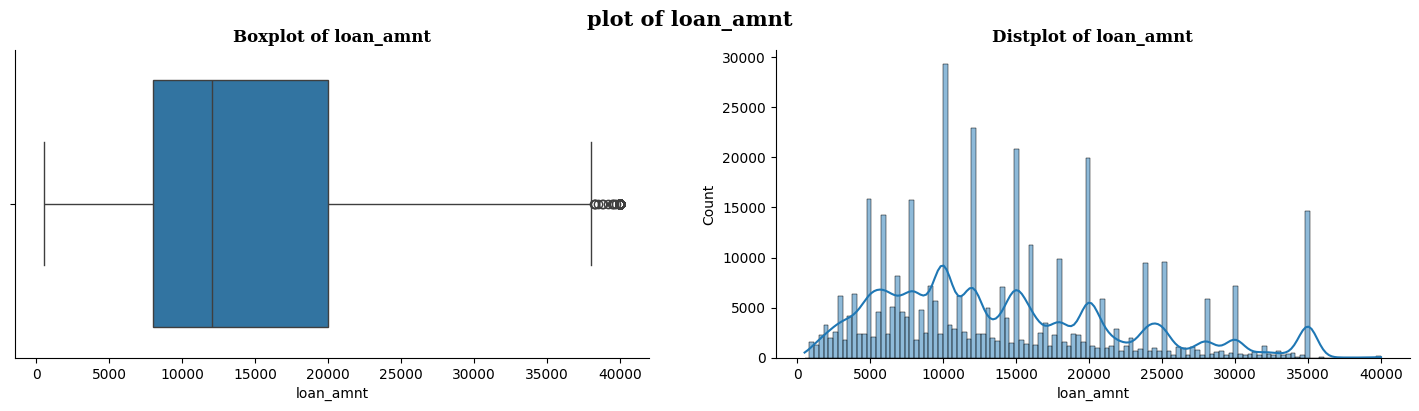

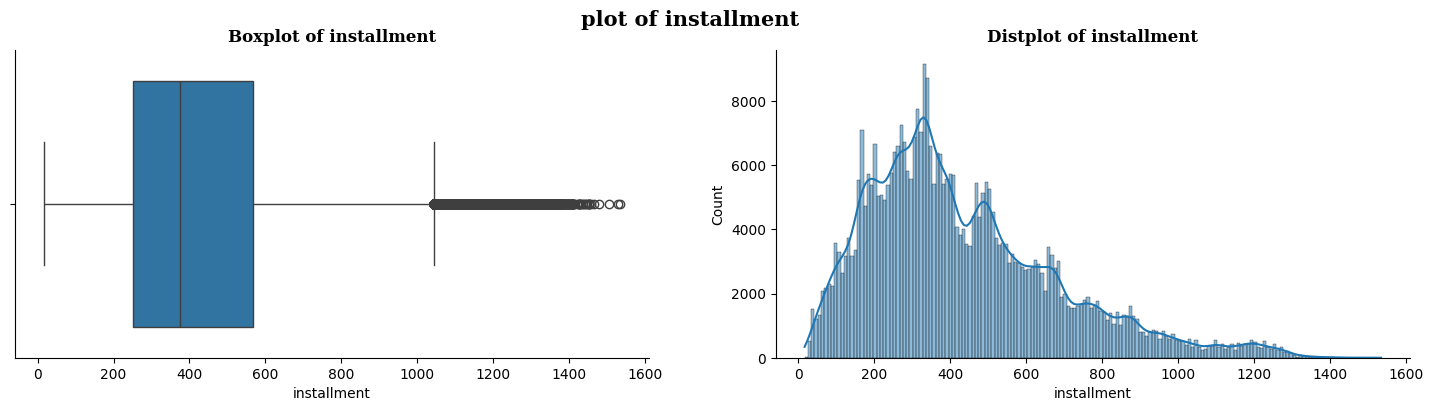

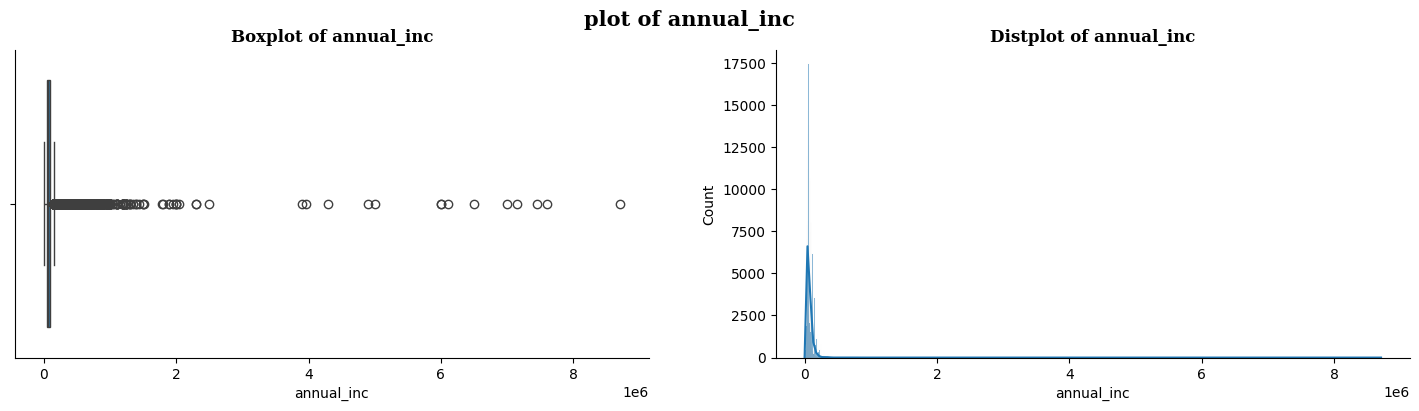

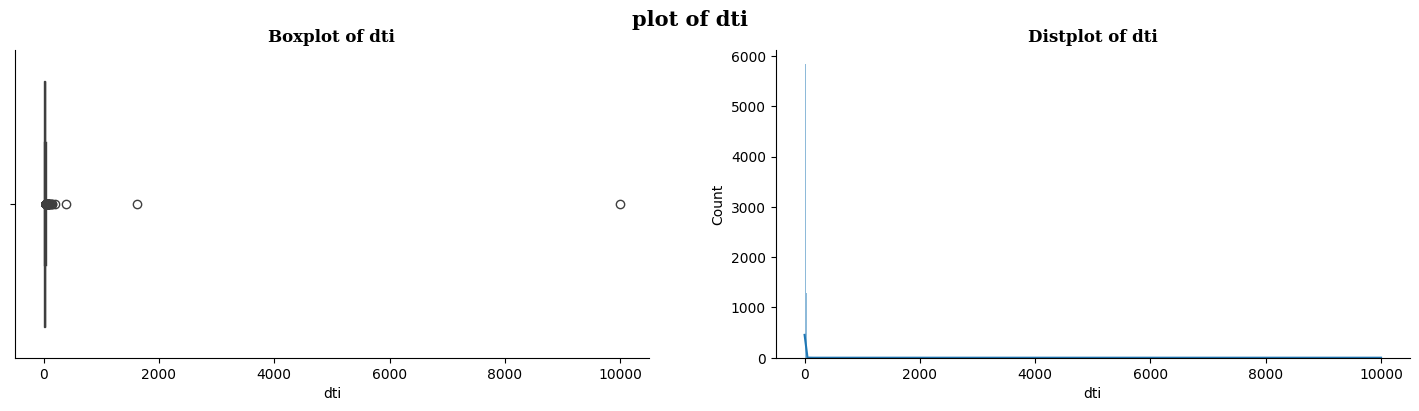

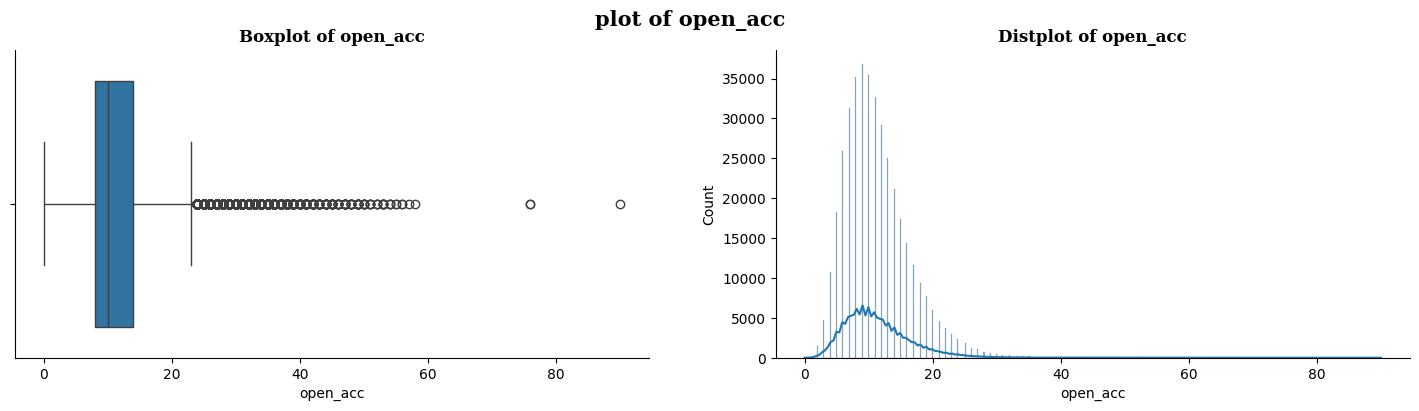

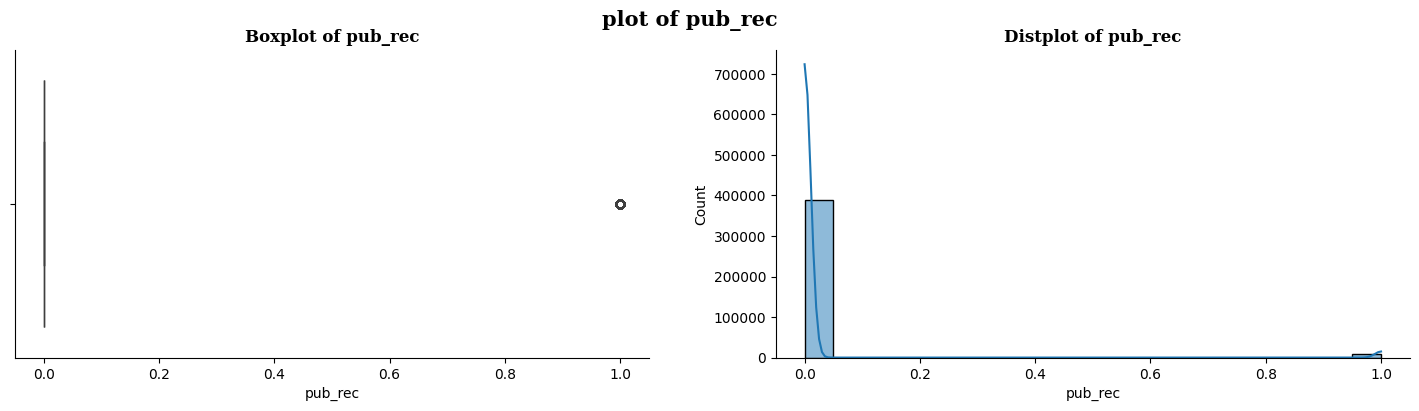

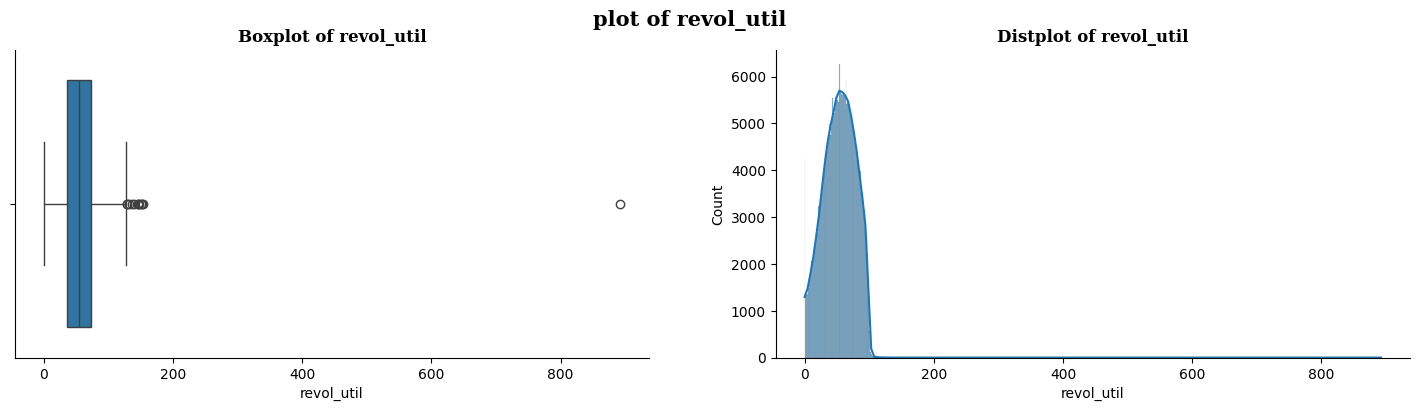

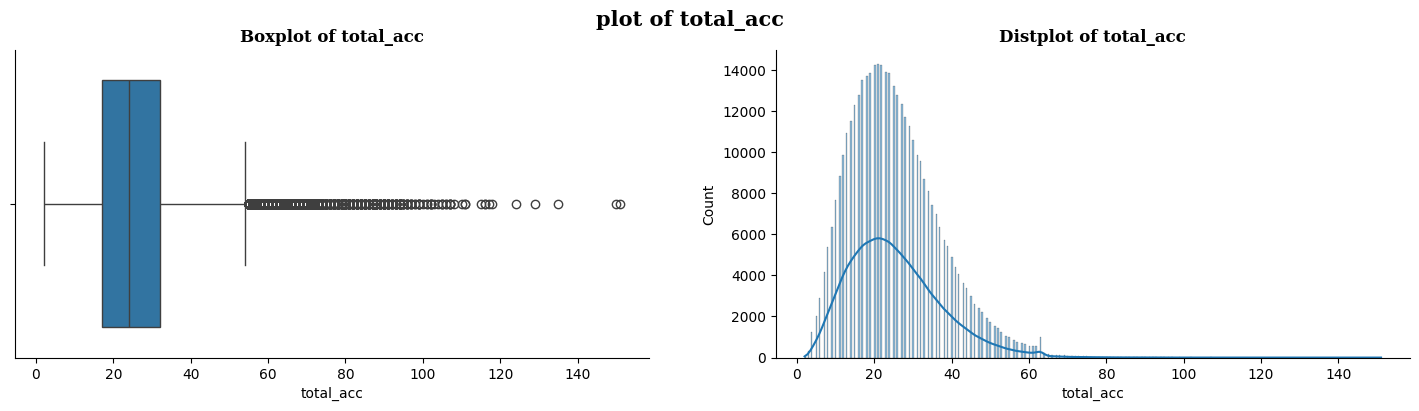

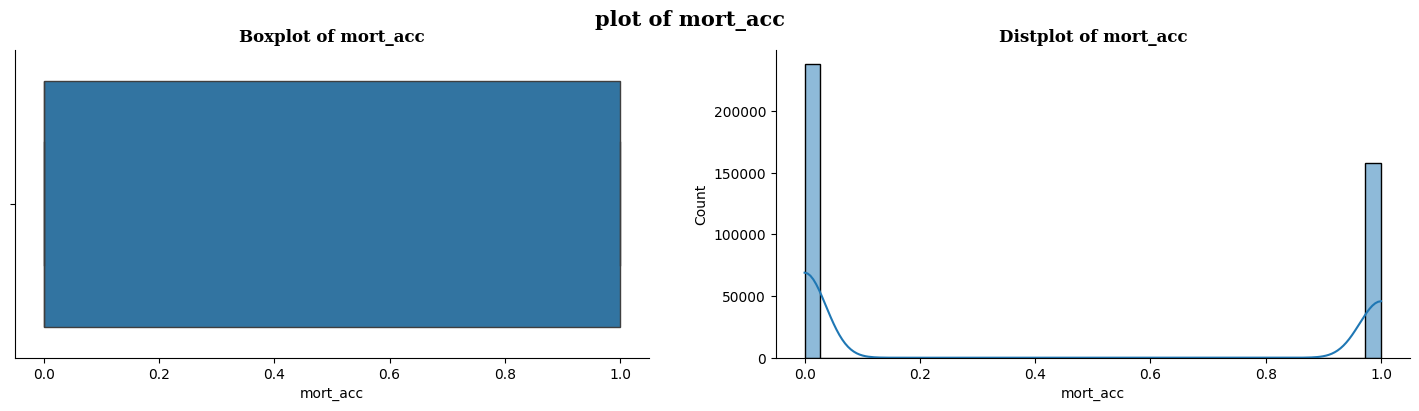

In [99]:
outlier_graphical_cols = num_cols.iloc[:,[0,2,3,4,5,6,8,9,10]]
for _,col in enumerate(outlier_graphical_cols.columns):
    plt.figure(figsize=(18,4))
    plt.suptitle(f'plot of {col}',fontsize=15,fontfamily='serif',fontweight='bold')
    plt.subplot(121)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}',fontsize=12,fontfamily='serif',fontweight='bold')
    plt.subplot(122)
    sns.histplot(x=df[col], kde=True)
    plt.title(f'Distplot of {col}',fontsize=12,fontfamily='serif',fontweight='bold')
    sns.despine()
    plt.show()

## Observation

The data points to a high frequency of outliers, which calls for more research into outlier detection methods.

Potential outliers might still exist among the numerical features.

The potential advantage of creating binary features from these variables is demonstrated by the notable sparse distribution of unique values displayed by features like Pub_rec, Mort_acc, and Pub_rec_bankruptcies.



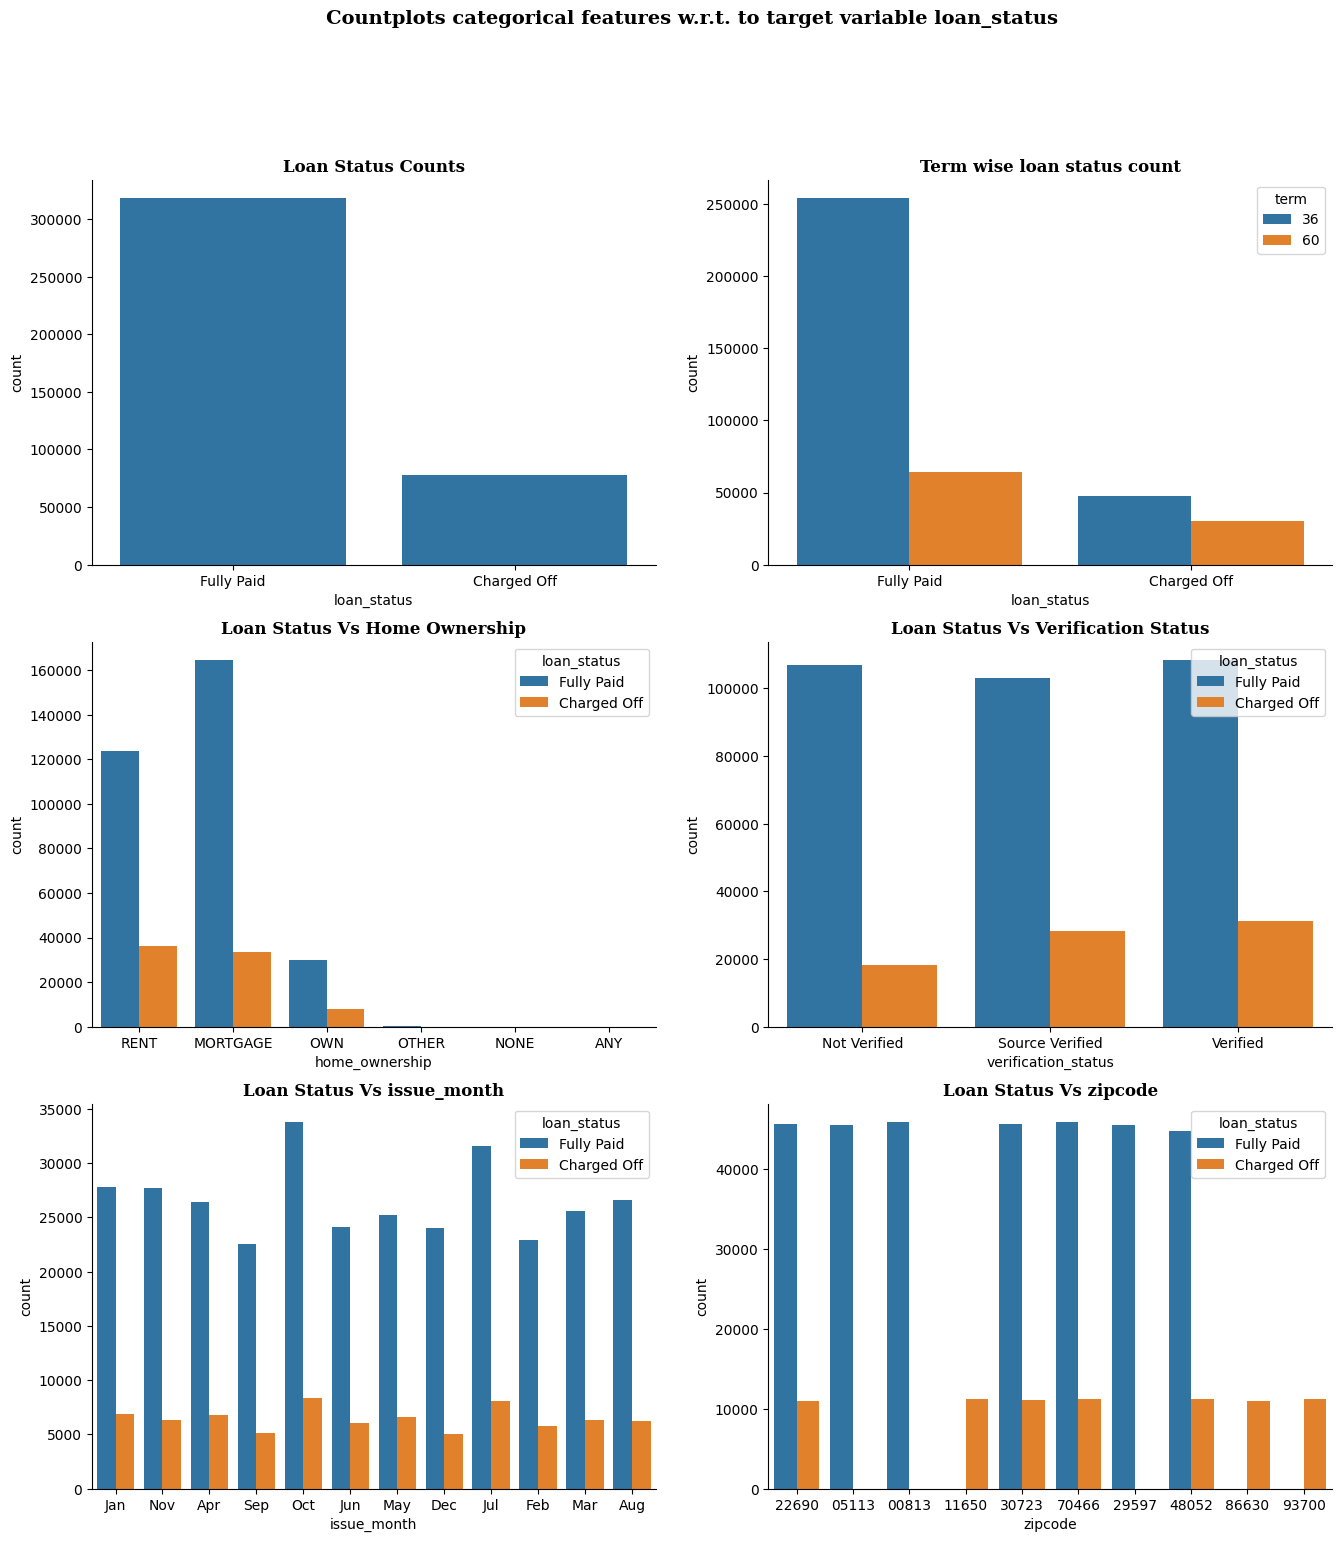

In [100]:
plt.figure(figsize=(16,17))
plt.suptitle('Countplots categorical features w.r.t. to target variable loan_status',
             fontsize=14,fontfamily='serif',fontweight='bold')
plt.subplot(321)
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Counts',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(322)
sns.countplot(data=df, x='loan_status', hue='term')
plt.title('Term wise loan status count',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(323)
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title('Loan Status Vs Home Ownership',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(324)
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title('Loan Status Vs Verification Status',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(325)
sns.countplot(data=df, x='issue_month', hue='loan_status')
plt.title('Loan Status Vs issue_month',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(326)
sns.countplot(data=df, x='zipcode', hue='loan_status')
plt.title('Loan Status Vs zipcode',fontsize=12,fontfamily='serif',fontweight='bold')
sns.despine()
plt.show()

In [101]:
zip_codes = ["11650", "86630", "93700"]
states = df[df['zipcode'].isin(zip_codes)]['state']

for zip_code, state in zip(zip_codes, states):
    print(f"Zip code: {zip_code}, State: {state}")

Zip code: 11650, State: VA
Zip code: 86630, State: MI
Zip code: 93700, State: MD


## Observation

Loans in zip codes 11650, 86630, and 93700 have not been fully repaid, according to observations.

Borrowers who live in "VA," "MI," and "MD" have not paid back their loans.

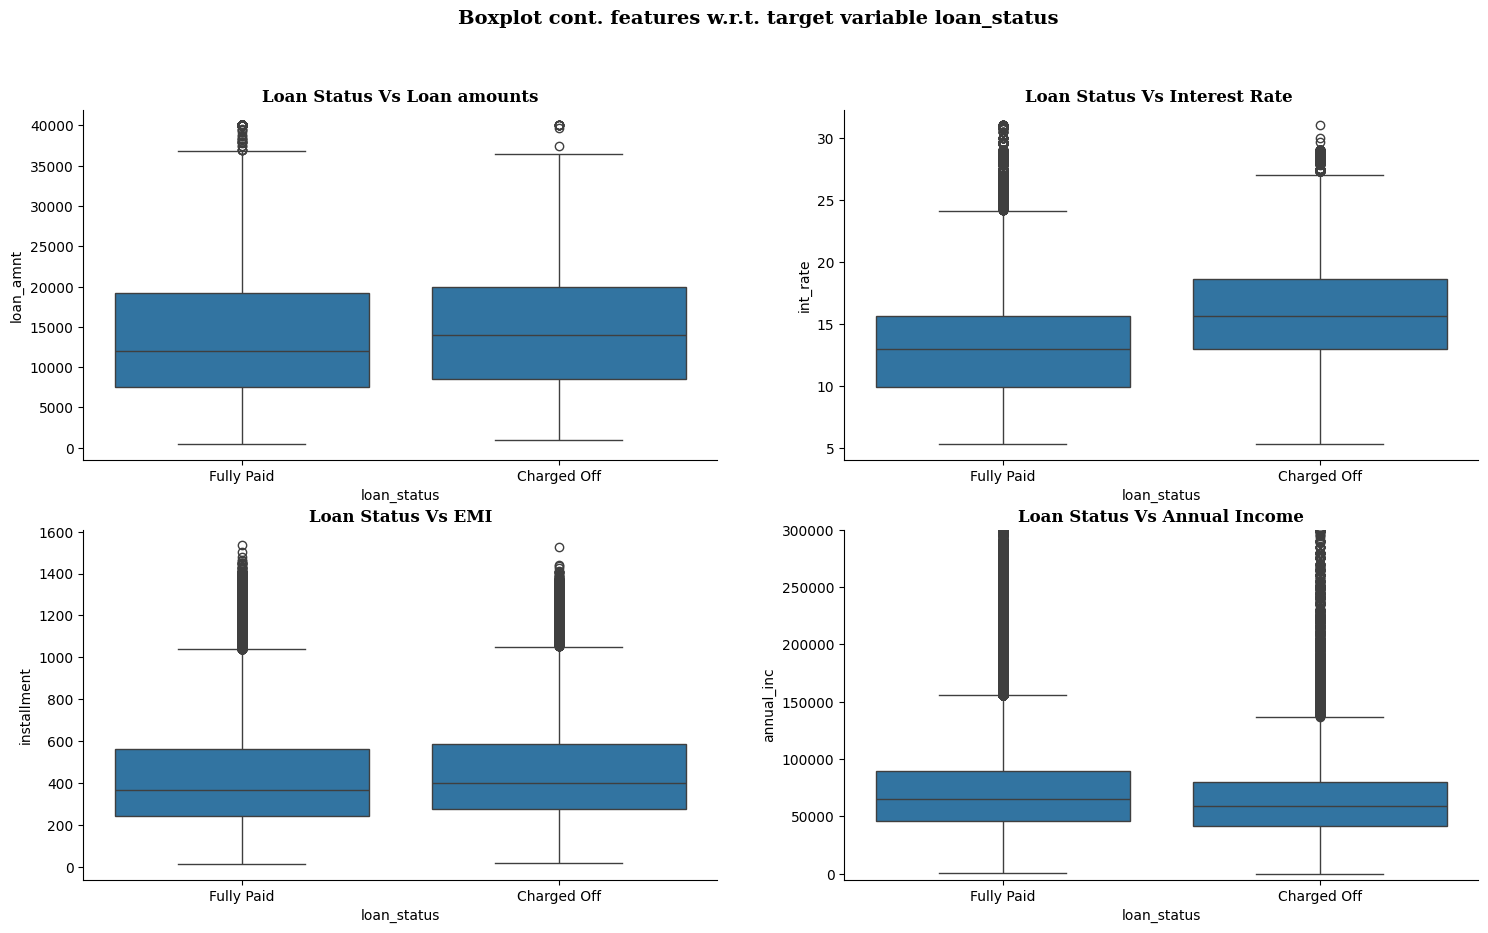

In [102]:
plt.figure(figsize=(18,10))
plt.suptitle('Boxplot cont. features w.r.t. target variable loan_status',
             fontsize=14,fontfamily='serif',fontweight='bold')
plt.subplot(221)
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Status Vs Loan amounts',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(222)
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Loan Status Vs Interest Rate ',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(223)
sns.boxplot(data=df, x='loan_status', y='installment')
plt.title('Loan Status Vs EMI',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(224)
sns.boxplot(data=df, x='loan_status', y='annual_inc')
plt.ylim(bottom=-5000, top=300000)
plt.title('Loan Status Vs Annual Income',fontsize=12,fontfamily='serif',fontweight='bold')
sns.despine()
plt.show()

## Observation

The median interest rate for Charged Off clients is significantly greater than that of Fully Paid customers.

Compared to fully paid clients, charged off customers have a lower median annual income.

Customers who are charged off typically have a higher median EMI than those who are fully paid.

Charged Off clients' median loan amounts are higher than those of fully paid-off customers.

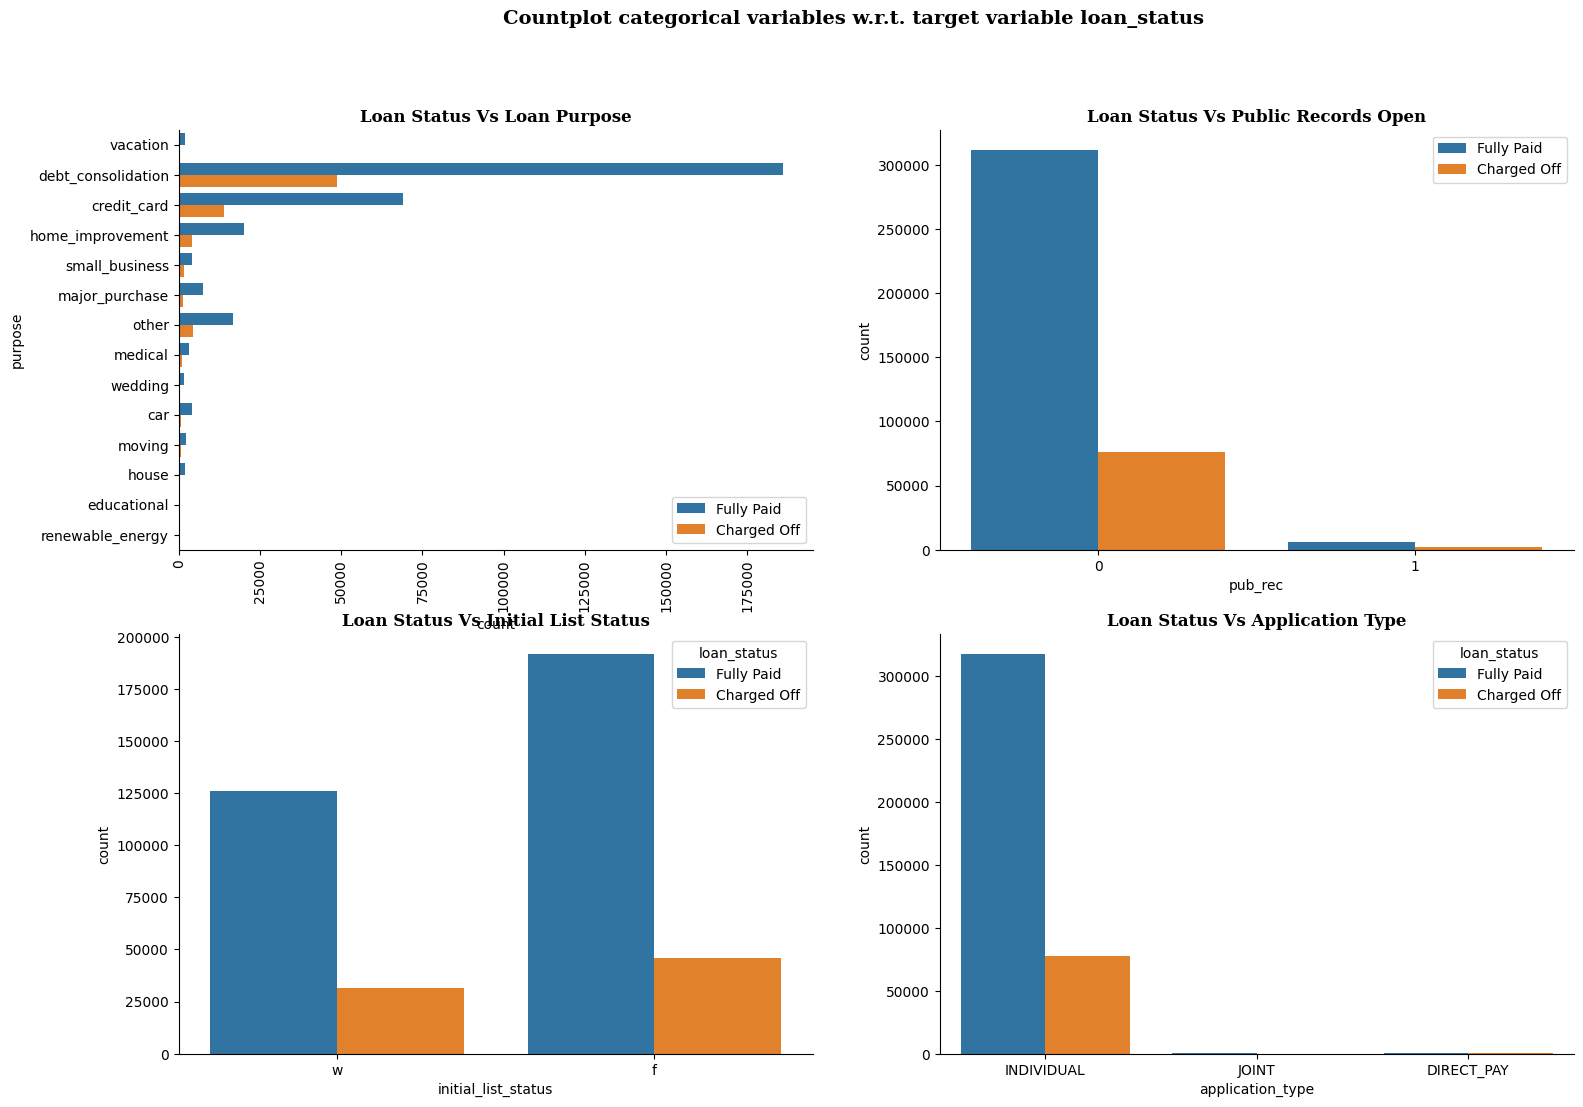

In [103]:
plt.figure(figsize=(18,12))
plt.suptitle('Countplot categorical variables w.r.t. target variable loan_status',
             fontsize=14,fontfamily='serif',fontweight='bold')
plt.subplot(221)
sns.countplot(data=df, y='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Status Vs Loan Purpose',fontsize=12,fontfamily='serif',fontweight='bold')
plt.legend(loc=4)
plt.subplot(222)
sns.countplot(data=df, x='pub_rec',hue='loan_status')
plt.title('Loan Status Vs Public Records Open',fontsize=12,fontfamily='serif',fontweight='bold')
plt.legend(loc=1)
plt.subplot(223)
sns.countplot(data=df, x='initial_list_status', hue='loan_status')
plt.title('Loan Status Vs Initial List Status',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(224)
sns.countplot(data=df, x='application_type',hue='loan_status')
plt.title('Loan Status Vs Application Type',fontsize=12,fontfamily='serif',fontweight='bold')
sns.despine()
plt.show()

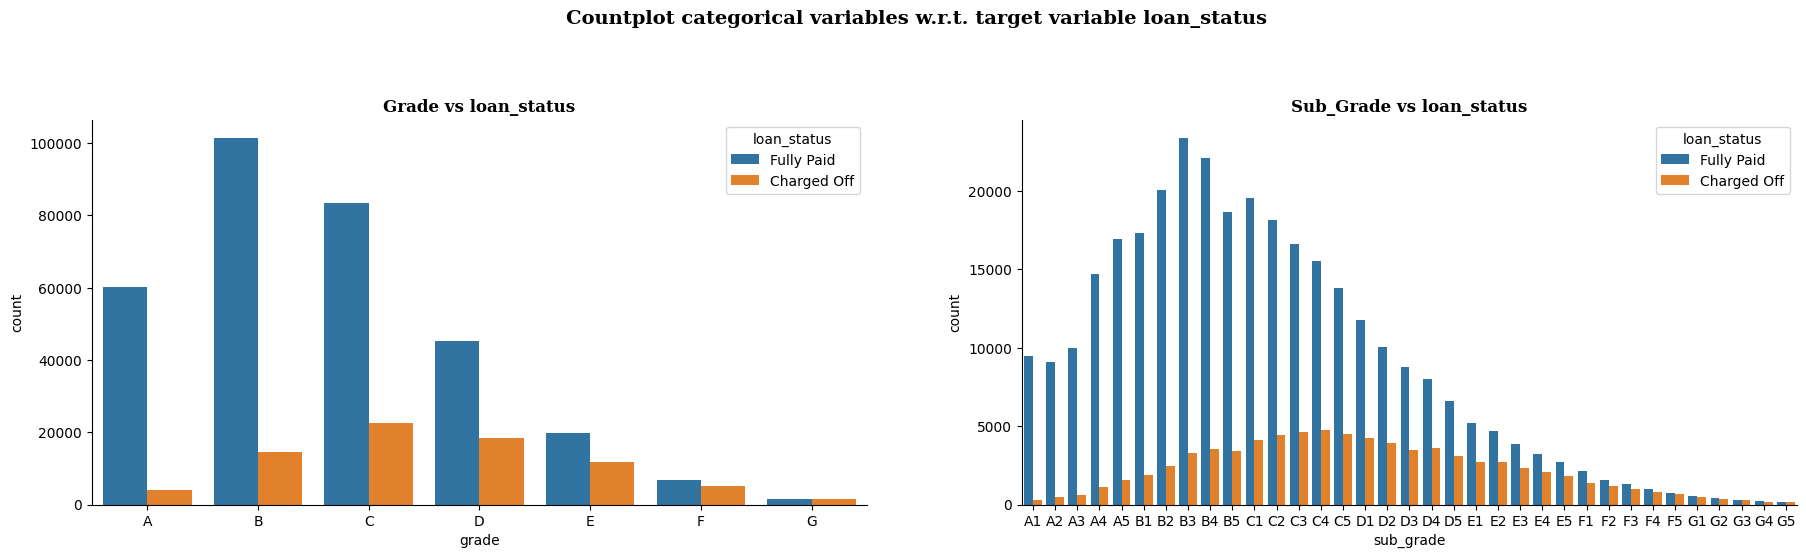

In [104]:
plt.figure(figsize=(22,11))
plt.suptitle('Countplot categorical variables w.r.t. target variable loan_status',
             fontsize=14,fontfamily='serif',fontweight='bold')
plt.subplot(221)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)
plt.title('Grade vs loan_status',fontsize=12,fontfamily='serif',fontweight='bold')
plt.subplot(222)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade,)
plt.title('Sub_Grade vs loan_status',fontsize=12,fontfamily='serif',fontweight='bold')
sns.despine()
plt.show()

## Observation

Credit card and debit consolidation are the two most common lending purposes.

Individual loan applications are the most common type.

When seen graphically, the distribution of open_acc seems to be very regular.

The distributions of the Charged Off and Fully Paid categories are comparable.

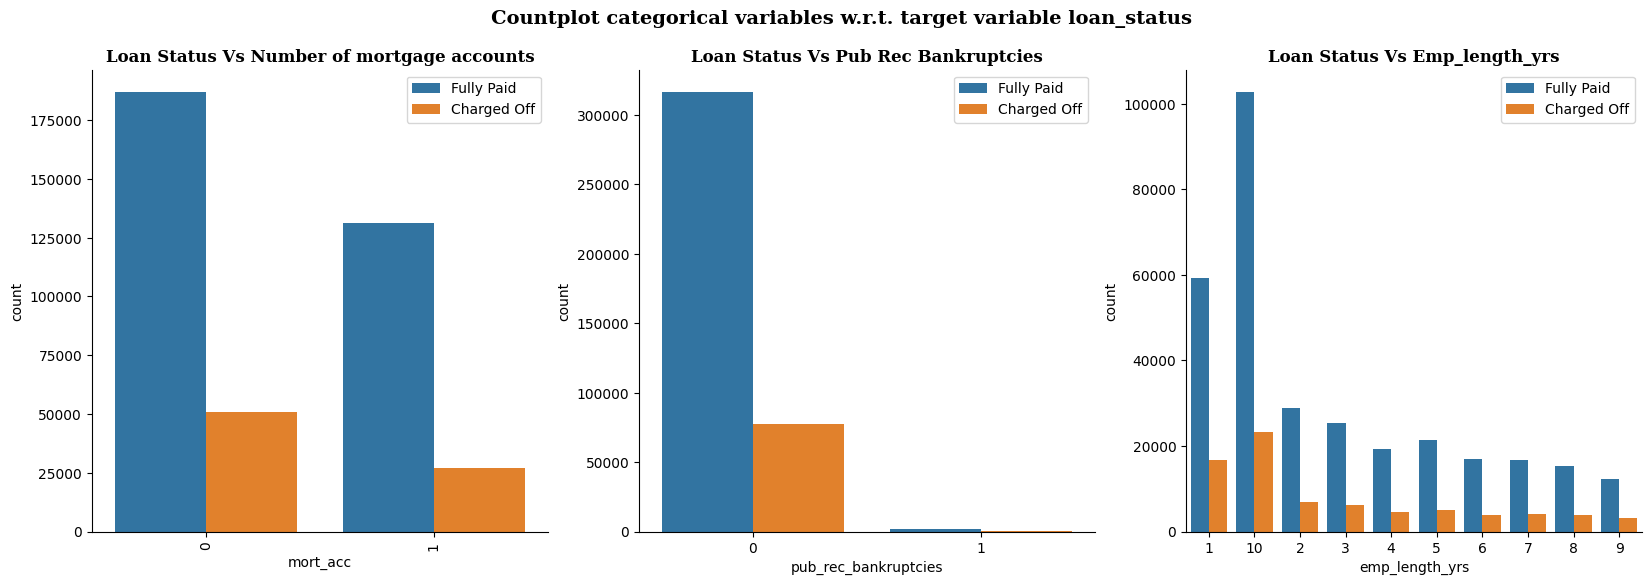

In [105]:
plt.figure(figsize=(20,6))
plt.suptitle('Countplot categorical variables w.r.t. target variable loan_status',
             fontsize=14,fontfamily='serif',fontweight='bold')
plt.subplot(131)
sns.countplot(data=df, x='mort_acc',hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Status Vs Number of mortgage accounts',fontsize=12,fontfamily='serif',fontweight='bold')
plt.legend(loc=1)
plt.subplot(132)
sns.countplot(data=df, x='pub_rec_bankruptcies',hue='loan_status')
plt.title('Loan Status Vs Pub Rec Bankruptcies',fontsize=12,fontfamily='serif',fontweight='bold')
plt.legend(loc=1)
plt.subplot(133)
order = sorted(df.emp_length_yrs.unique().tolist())
sns.countplot(data=df, x='emp_length_yrs',hue='loan_status',order=order,)
plt.title('Loan Status Vs Emp_length_yrs',fontsize=12,fontfamily='serif',fontweight='bold')
plt.legend(loc=1)
sns.despine()
plt.show()

# Comment about the correlation between Loan Amount and Installment features.

In [106]:
df[['loan_amnt', 'installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953929
installment,0.953929,1.000000


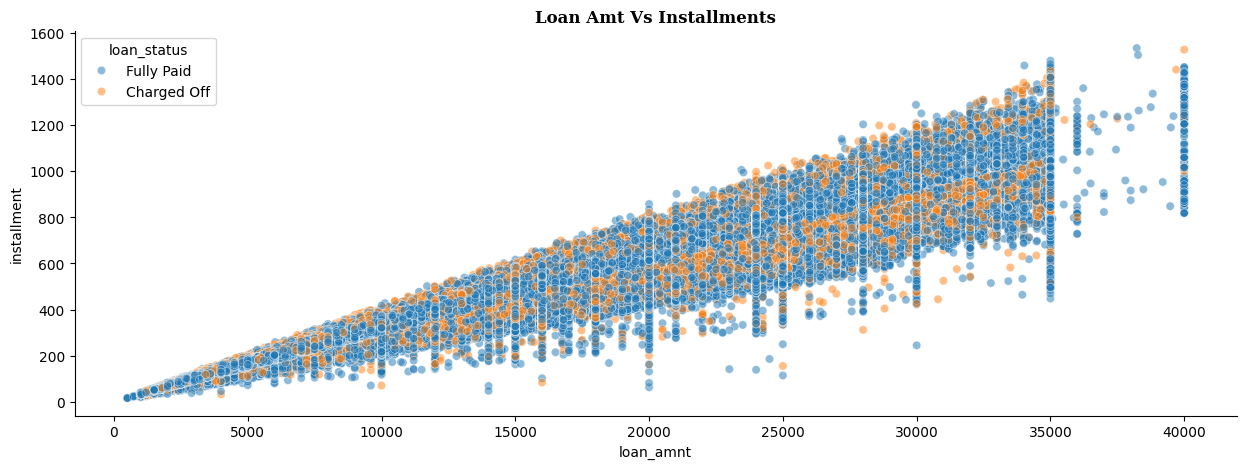

In [107]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = 'loan_amnt', y = 'installment', alpha = 0.5, hue = 'loan_status')
plt.title('Loan Amt Vs Installments',fontsize=12,fontfamily='serif',fontweight='bold')
sns.despine()
plt.show()

## Observation

The degree and direction of the linear link between two variables are measured by the correlation coefficient. In this instance, there is a strong positive linear link between "loan_amnt" and "installment," as evidenced by the high correlation coefficient between the two variables (around 0.95).

Establishing suitable loan terms requires an understanding of the connection between the loan amount and monthly payments. Depending on the borrower's capacity to make installment payments for varying loan amounts, lenders may modify loan parameters including interest rates and payback schedules.


Multicollinearity between strongly correlated predictor variables must be carefully considered when developing predictive models. Unstable estimates and trouble comprehending the model coefficients might result from multicollinearity. Consequently, multicollinearity may need to be addressed using strategies like variable selection or regularization.

# The majority of people have home ownership as _______.

In [108]:
(df['home_ownership'].value_counts(normalize=True)*100).to_frame()

,proportion
home_ownership,
MORTGAGE,50.084085
RENT,40.347953
OWN,9.531096
OTHER,0.028281
NONE,0.007828
ANY,0.000758


## Observation

Roughly 50.08%, are mortgage holders, suggesting that a sizable percentage of people own homes thanks to mortgage arrangements.

# People with grades ‘A’ are more likely to fully pay their loan. (T/F)

In [109]:
pd.crosstab(df['grade'],df['loan_status'], normalize = 'index')

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


## Observation

It's true. With over 93.71% of loans being fully repaid, borrowers with grade "A" credit have a remarkably high chance of doing so. This implies that borrowers who have the best credit scores are more likely to successfully complete their loan obligations.

# Name the top 2 afforded job titles.

In [110]:
df[df['emp_title'] != 'No Employee Title']['emp_title'].value_counts().to_frame().head()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


In [111]:
df.groupby('emp_title')['loan_status'].count().sort_values(ascending=False).to_frame()[1:6]

,loan_status
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


The Most afforded job titles are Teachers & Managers.

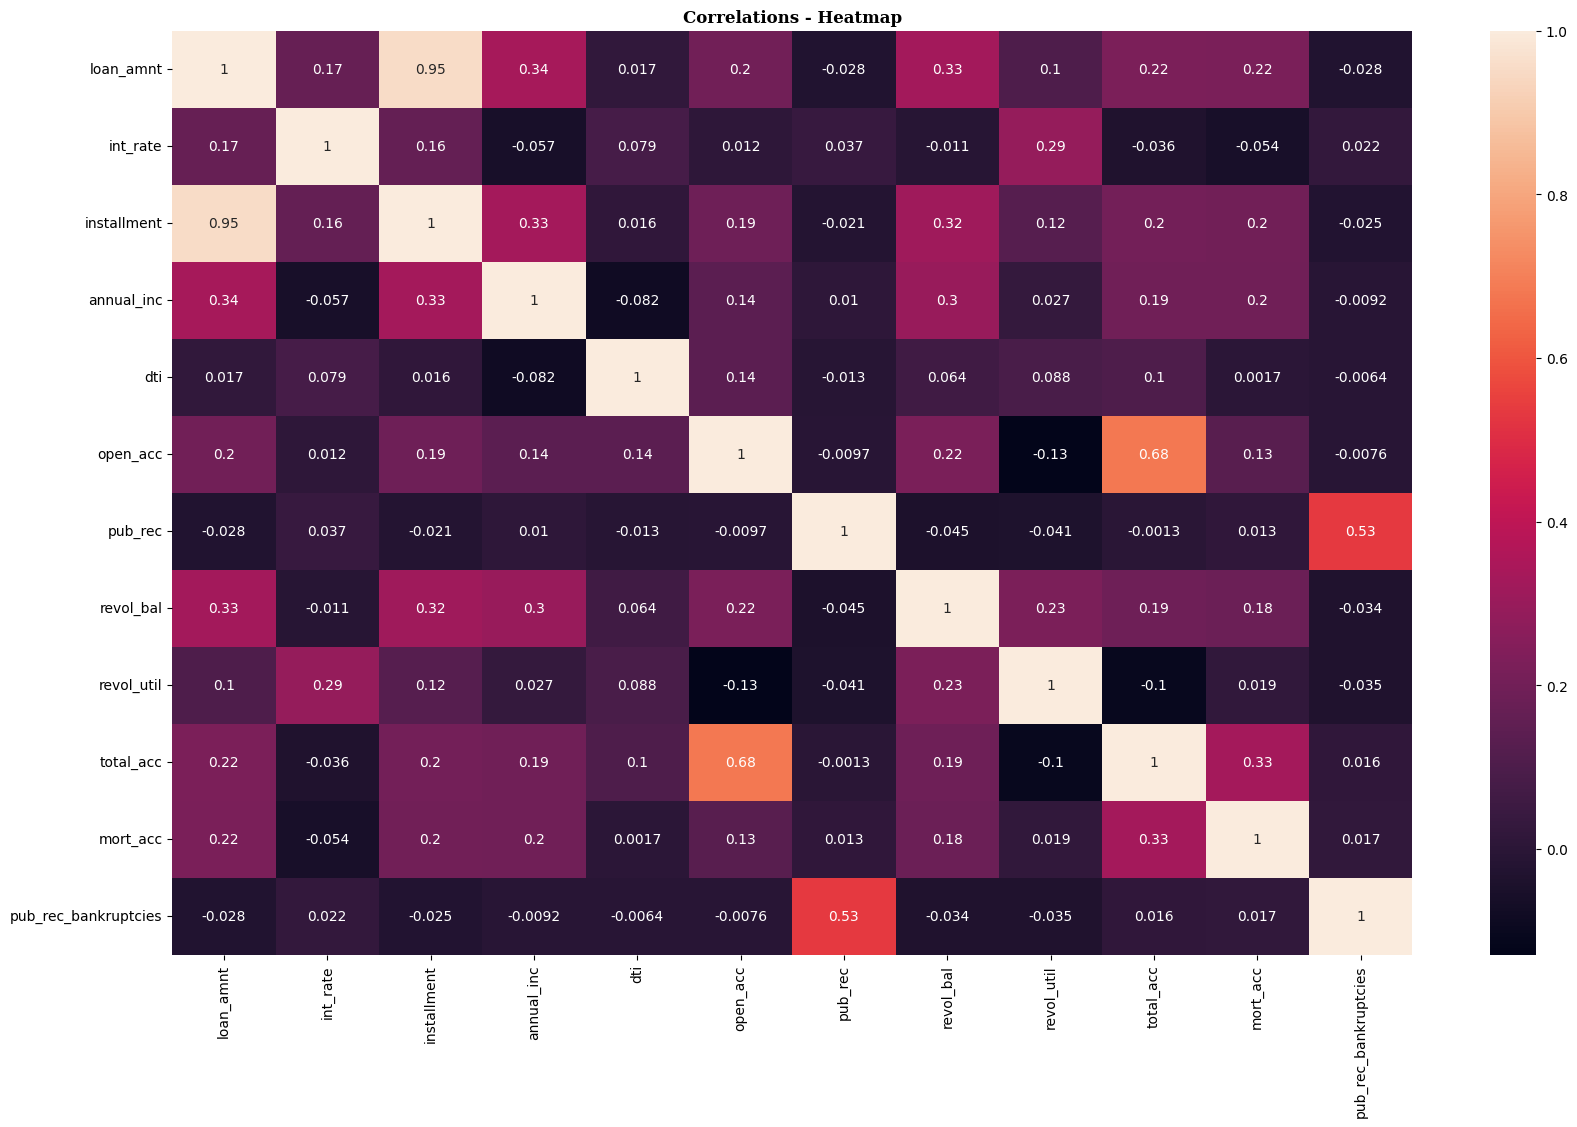

In [112]:
plt.figure(figsize=(20,12))
sns.heatmap(num_cols.corr(), annot=True)
plt.title('Correlations - Heatmap',fontsize=12,fontfamily='serif',fontweight='bold')
plt.show()

## Observation

Loan_amnt and installment have a strong association, meaning that greater loan amounts translate into larger installment payments.

There is a strong association between the variables total_acc and open_acc.

A significant relationship exists between pub_rec and pub_rec_bankruptcies.

# Handling Outliers

In [113]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [114]:
def remove_outliers_zscore(df, threshold=2): # approx 95% of data
    """
    Remove outliers from a DataFrame using the Z-score method.

    Parameters:
        df (DataFrame): The input DataFrame.
        threshold (float): The Z-score threshold for identifying outliers.
                           Observations with a Z-score greater than this threshold will be considered as outliers.
    Returns:
        DataFrame: The DataFrame with outliers removed.
    """
    z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

    outliers = np.abs(z_scores) > threshold

    df_cleaned = df[~outliers.any(axis=1)]

    return df_cleaned

cleaned_df = remove_outliers_zscore(df1)
print(cleaned_df.shape)

(311392, 30)


In [115]:
def clip_outliers_zscore(df, threshold=2):
    """
    Clip outliers in a DataFrame using the Z-score method.

    Parameters:
        df (DataFrame): The input DataFrame.
        threshold (float): The Z-score threshold for identifying outliers.
                           Observations with a Z-score greater than this threshold will be considered as outliers.

    Returns:
        DataFrame: The DataFrame with outliers clipped.
    """
    z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

    clipped_values = df[numerical_cols].clip(df[numerical_cols].mean() - threshold * df[numerical_cols].std(),
                                             df[numerical_cols].mean() + threshold * df[numerical_cols].std(),
                                             axis=1)

    df_clipped = df.copy()
    df_clipped[numerical_cols] = clipped_values

    return df_clipped

clipped_df = clip_outliers_zscore(df1)
print(clipped_df.shape)

(396030, 30)


In [116]:
data = cleaned_df.copy()
cp_data = clipped_df.copy()
data.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,er_cr_line_m,er_cr_line_y,state,zipcode,emp_length_yrs
121377,16000.0,36,13.67,544.29,B,B5,"Alcatel-Lucent USA, Inc.",RENT,41500.0,Verified,Fully Paid,debt_consolidation,Consolidation 001,19.2,7.0,0,14830.0,56.4,8.0,f,INDIVIDUAL,0,0,Apr,2012,Jun,2003,ID,22690,2


In [117]:
data['pub_rec_bankruptcies'].value_counts() , data['pub_rec'].value_counts()

(pub_rec_bankruptcies
 0    311392
 Name: count, dtype: int64,
 pub_rec
 0    311392
 Name: count, dtype: int64)

In [118]:
cp_data['pub_rec_bankruptcies'].value_counts() , cp_data['pub_rec'].value_counts()

(pub_rec_bankruptcies
 0.000000    393705
 0.158662      2325
 Name: count, dtype: int64,
 pub_rec
 0.000000    388011
 0.301947      8019
 Name: count, dtype: int64)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311392 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             311392 non-null  float64
 1   term                  311392 non-null  object 
 2   int_rate              311392 non-null  float64
 3   installment           311392 non-null  float64
 4   grade                 311392 non-null  object 
 5   sub_grade             311392 non-null  object 
 6   emp_title             311392 non-null  object 
 7   home_ownership        311392 non-null  object 
 8   annual_inc            311392 non-null  float64
 9   verification_status   311392 non-null  object 
 10  loan_status           311392 non-null  object 
 11  purpose               311392 non-null  object 
 12  title                 311392 non-null  object 
 13  dti                   311392 non-null  float64
 14  open_acc              311392 non-null  float64
 15  pub_r

In [120]:
data['loan_status']=data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

data['initial_list_status']=data.initial_list_status.map({'w':0, 'f':1})

data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,er_cr_line_m,er_cr_line_y,state,zipcode,emp_length_yrs
0,10000.0,36,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,1,vacation,Vacation,26.24,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0,0,Jan,2015,Jun,1990,OK,22690,10
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,Debt consolidation,22.05,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1,0,Jan,2015,Jul,2004,SD,05113,4
2,15600.0,36,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,1,credit_card,Credit card refinancing,12.79,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0,0,Jan,2015,Aug,2007,WV,05113,1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,1,credit_card,Credit card refinancing,2.60,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0,0,Nov,2014,Sep,2006,MA,00813,6
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,0,credit_card,Credit Card Refinance,33.95,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,0,0,Apr,2013,Mar,1999,VA,11650,9


# Feature selection - Hypothesis testing & VIF(multicolinearity)

In [121]:
lt = data.drop(columns=['emp_title','title','sub_grade','er_cr_line_m','er_cr_line_y','initial_list_status',
                        'state','issue_month','issue_year','pub_rec','pub_rec_bankruptcies'],axis=1)
lt.shape

(311392, 19)

## OneHotEncoding on feature having multiple variable

In [122]:
dummies=['zipcode', 'grade','purpose','home_ownership','verification_status','application_type']
ltd = pd.get_dummies(lt, columns=dummies, drop_first=True)*1

ltd.shape

(311392, 50)

In [123]:
X = ltd.drop(['loan_status'], axis=1)
y = ltd['loan_status']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(249113, 49)
(62279, 49)
(249113,)
(62279,)


# Minmax scaling

In [126]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,emp_length_yrs,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
0,0.379538,0.0,0.339161,0.411590,0.207250,0.465341,0.368421,0.171897,0.419816,0.276596,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.643564,1.0,0.680070,0.524221,0.367868,0.252652,0.473684,0.221905,0.590398,0.340426,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.168317,0.0,0.208625,0.176198,0.134712,0.357576,0.368421,0.052236,0.304392,0.212766,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.379538,1.0,0.680070,0.307444,0.367868,0.449242,0.315789,0.255109,0.767109,0.297872,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.368812,0.0,0.543706,0.421460,0.246109,0.315530,0.263158,0.090649,0.614913,0.361702,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [127]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [129]:
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

logreg_model.score(X_test, y_test) , logreg_model.score(X_test, y_test_pred)

(0.8934793429566948, 1.0)

Train Accuracy : 0.8934339034895811
Train F1 Score: 0.9382212696440165
Train Recall Score: 0.99595357730446
Train Precision Score: 0.886815362280586

Test Accuracy : 0.8934793429566948
Test F1 Score: 0.9382309124767225
Test Recall Score: 0.995691784747337
Test Precision Score: 0.8870402647933943


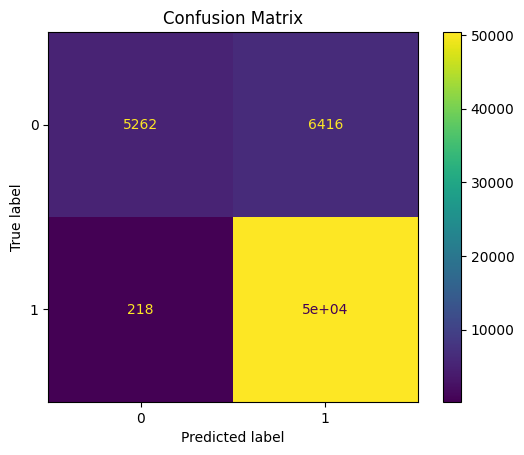

In [131]:
print('Train Accuracy :', logreg_model.score(X_train, y_train))
print('Train F1 Score:',f1_score(y_train,y_train_pred))
print('Train Recall Score:',recall_score(y_train,y_train_pred))
print('Train Precision Score:',precision_score(y_train,y_train_pred))

print('\nTest Accuracy :',logreg_model.score(X_test,y_test))
print('Test F1 Score:',f1_score(y_test,y_test_pred))
print('Test Recall Score:',recall_score(y_test,y_test_pred))
print('Test Precision Score:',precision_score(y_test,y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [132]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     11678
           1       0.89      1.00      0.94     50601

    accuracy                           0.89     62279
   macro avg       0.92      0.72      0.78     62279
weighted avg       0.90      0.89      0.88     62279



In [133]:
sm=SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 202401
Before OverSampling, count of label 0: 46712
After OverSampling, count of label 1: 202401
After OverSampling, count of label 0: 202401


Train Accuracy : 0.7935033498853934
Train F1 Score: 0.8614290524614452
Train Recall Score: 0.7899763341090212
Train Precision Score: 0.9470928304032602

Test Accuracy : 0.7955330047046356
Test F1 Score: 0.862983924767049
Test Recall Score: 0.7925139819371159
Test Precision Score: 0.9472092968325578


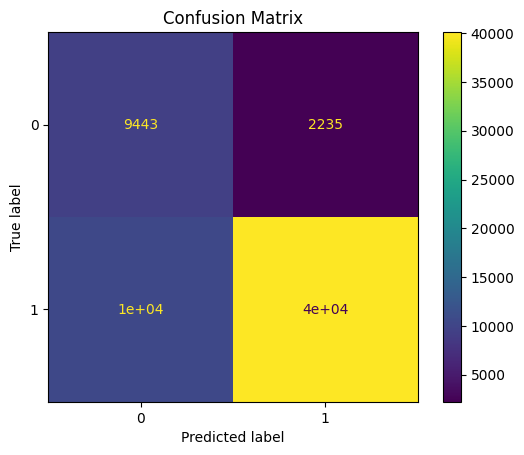

In [135]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print('Train Accuracy :', model.score(X_train, y_train))
print('Train F1 Score:',f1_score(y_train,train_preds))
print('Train Recall Score:',recall_score(y_train,train_preds))
print('Train Precision Score:',precision_score(y_train,train_preds))

print('\nTest Accuracy :',model.score(X_test,y_test))
print('Test F1 Score:',f1_score(y_test,test_preds))
print('Test Recall Score:',recall_score(y_test,test_preds))
print('Test Precision Score:',precision_score(y_test,test_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [136]:
y_pred = test_preds
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60     11678
           1       0.95      0.79      0.86     50601

    accuracy                           0.80     62279
   macro avg       0.71      0.80      0.73     62279
weighted avg       0.86      0.80      0.81     62279



## Observation

By correctly identifying 80% of real defaulters, the model exhibits a high recall score.

Only 47% of anticipated defaulters actually become defaulters, indicating a low precision for the positive class (defaulters).

Although the model is successful in identifying the majority of defaulters, it also produces a large number of false positives, as evidenced by its high recall and low precision. As a result, many worthy clients might not be granted loans.

Despite an overall accuracy of 80%, the low precision negatively impacts the F1 score, lowering it to 60%. This demonstrates how the model's performance involves a trade-off between recall and precision.


# Reguralization Model

In [138]:
lamb = np.arange(0.01, 10000, 10)

train_scores = []
test_scores = []

for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)

    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)

    train_scores.append(tr_score)
    test_scores.append(te_score)

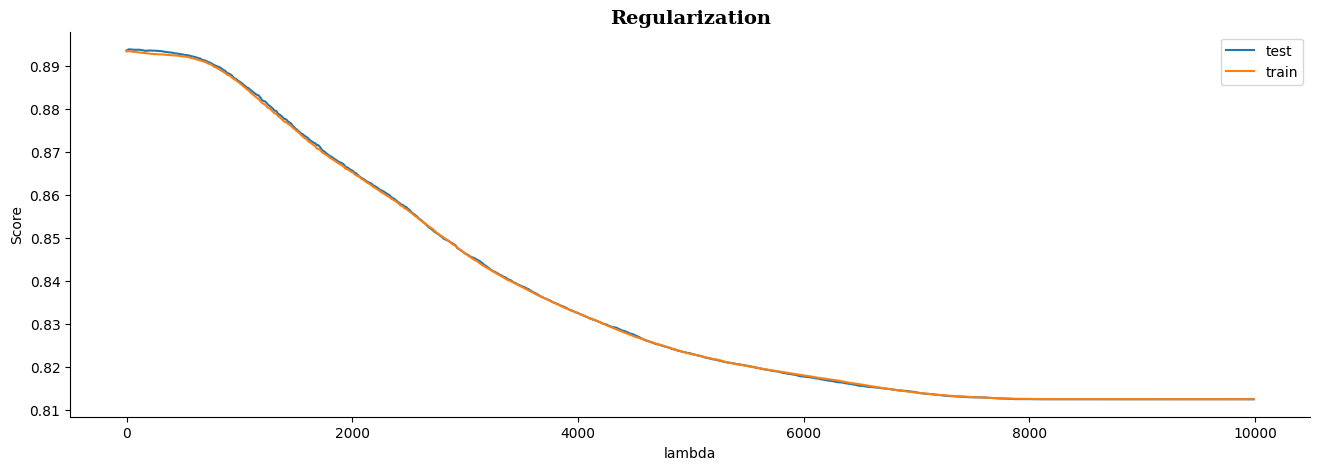

In [140]:
ran = np.arange(0.01, 10000, 10)
plt.figure(figsize=(16,5))
sns.lineplot(x=ran,y=test_scores,label='test')
sns.lineplot(x=ran,y=train_scores,label='train')
plt.title('Regularization',fontsize=14,fontfamily='serif',fontweight='bold')
plt.xlabel("lambda")
plt.ylabel("Score")
sns.despine()
plt.show()

In [141]:
best_lamb = 0.01 + (10*2)
best_lamb

20.01

In [142]:
reg_model = LogisticRegression(C=1/best_lamb)
reg_model.fit(X_train, y_train)

LogisticRegression(C=0.04997501249375312)

In [144]:
y_reg_pred = reg_model.predict(X_test)
y_reg_pred_proba = reg_model.predict_proba(X_test)

print(f'Logistic Regression Model Score with best lambda: ',end='')
print(round(model.score(X_test, y_test)*100,2),'%')

Logistic Regression Model Score with best lambda: 81.25 %


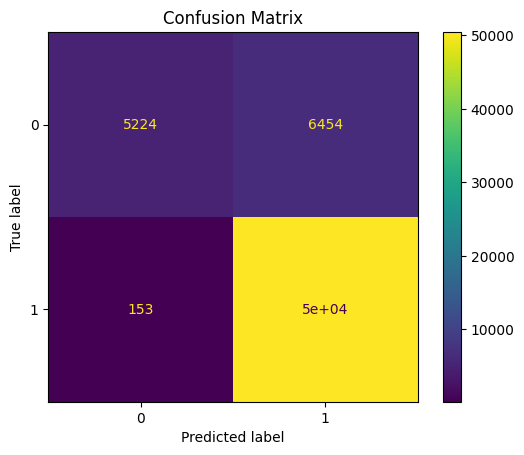

In [145]:
cm = confusion_matrix(y_test, y_reg_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [146]:
print(classification_report(y_test, y_reg_pred))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     11678
           1       0.89      1.00      0.94     50601

    accuracy                           0.89     62279
   macro avg       0.93      0.72      0.78     62279
weighted avg       0.90      0.89      0.88     62279



# K-fold - Cross validation

In [147]:
x=scaler.fit_transform(X)

kfold = KFold(n_splits=10)
accuracy = np.mean(cross_val_score(reg_model,x,y,cv=kfold,scoring='accuracy'))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.894


In [148]:
cm = confusion_matrix(y_test, y_reg_pred)
cm_df = pd.DataFrame(cm, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_df

,Defaulter,Fully paid
Defaulter,5224,6454
Fully paid,153,50448


## Observation

TN = 5223 (True Negative: Charged Off was accurately predicted)

TP is 50450. (True Positive: Fully Paid and accurately forecasted)

FP is 6455. (False Positive: Charged off even if fully paid was predicted.)

FN = 151 (False Negative: Charged Off was predicted but paid in full)

Actual Charged Off Negative = 5223 + 6455 = 11678

151 + 50450 = 50601 is the actual positive (fully paid) amount.

5223 + 151 = 5374 is the predicted negative (charged off).

Fully Paid Predicted Positive = 6455 + 50450 = 56905


In [149]:
coeff_df = pd.DataFrame()
coeff_df['Features'] = X_train_res.columns
coeff_df['Weights'] = model.coef_[0]
coeff_df['ABS_Weights'] = abs(coeff_df['Weights'])
coeff_df = coeff_df.sort_values(['ABS_Weights'], ascending=False)
coeff_df

,Features,Weights,ABS_Weights
13,zipcode_11650,-0.465074,0.465074
20,zipcode_93700,-0.461597,0.461597
19,zipcode_86630,-0.460198,0.460198
12,zipcode_05113,0.393420,0.393420
15,zipcode_29597,0.392065,0.392065
1,term,-0.284876,0.284876
2,int_rate,-0.274231,0.274231
24,grade_E,-0.199183,0.199183
23,grade_D,-0.197492,0.197492
21,grade_B,0.153863,0.153863


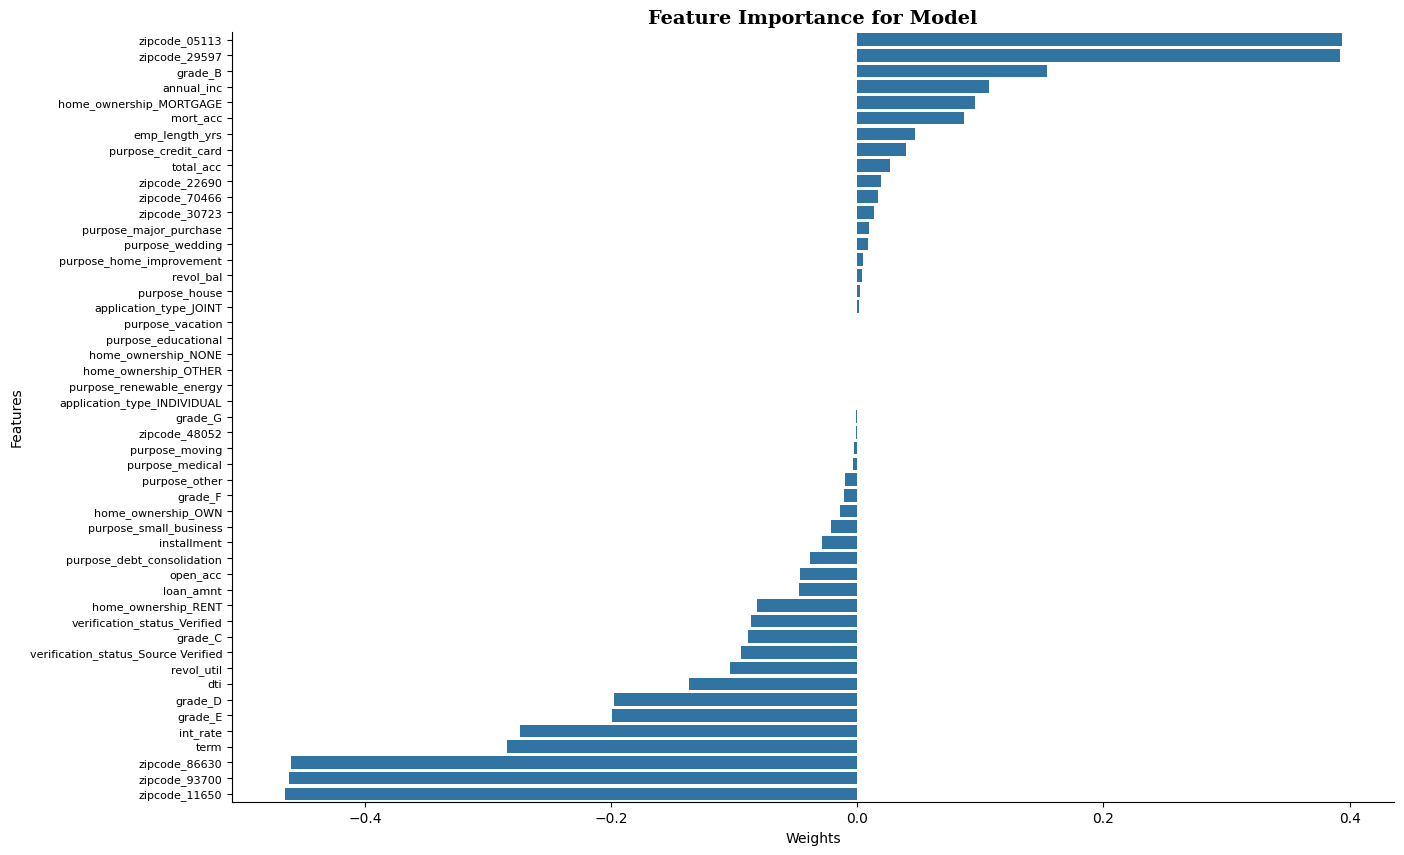

In [150]:
imp_feature = coeff_df.sort_values(by='Weights',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y = imp_feature['Features'],
           x = imp_feature['Weights'])
plt.title("Feature Importance for Model",fontsize=14,fontfamily='serif',fontweight='bold')
plt.xlabel("Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

In [151]:
model.intercept_

array([1.76790228])

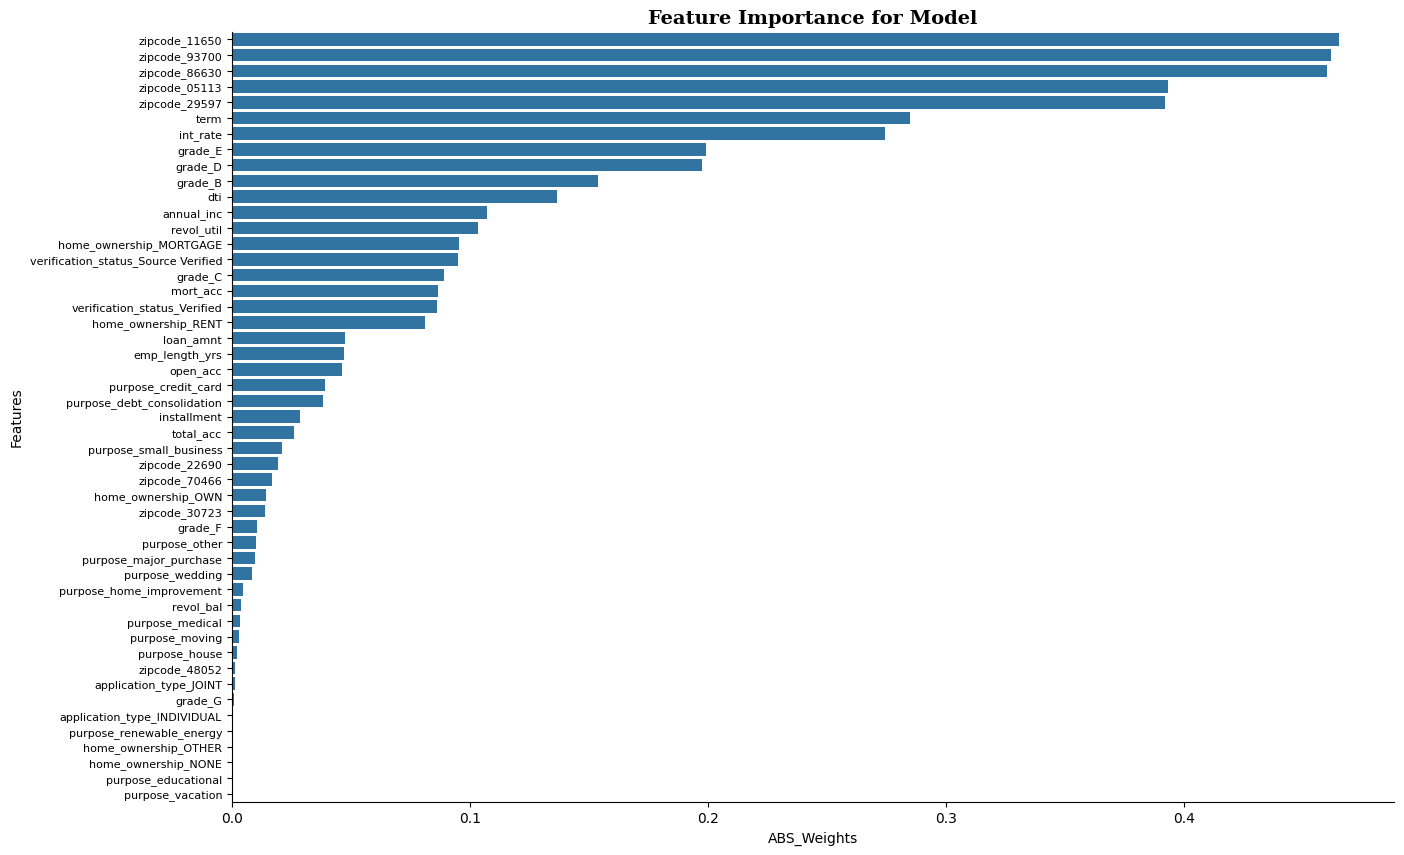

In [152]:
plt.figure(figsize=(15,10))
sns.barplot(y = coeff_df['Features'],x = coeff_df['ABS_Weights'])
plt.title("Feature Importance for Model",fontsize=14,fontfamily='serif',fontweight='bold')
plt.xlabel("ABS_Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

## Observation

Certain zip codes have a large influence on the prediction of defaulters, as evidenced by the model's significant weighting of the zip_code, annual income, and grade characteristics.

High positive coefficients also indicate the significance of features like loan_amnt (loan amount), open_acc (number of open accounts), and dti (debt-to-income ratio) in forecasting default risk.

However, a number of zip codes show significant negative coefficients, indicating that they are linked to a decreased default risk.



# ROC AUC curve

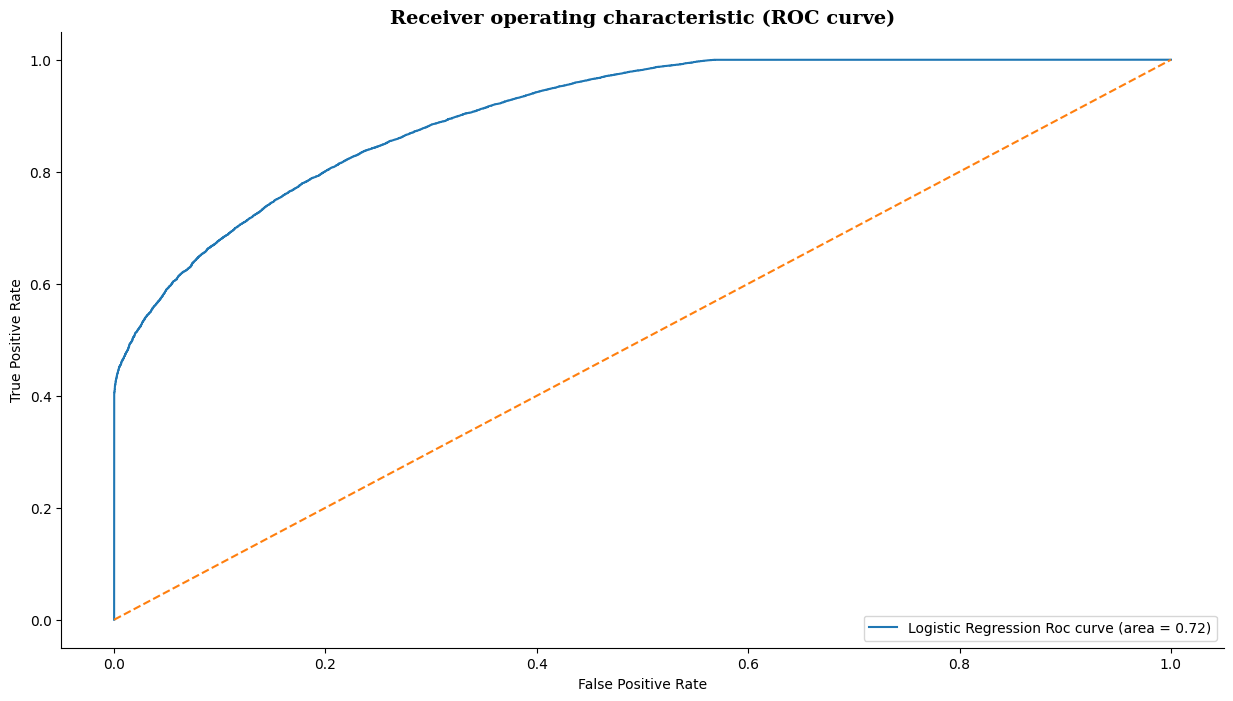

In [155]:
logit_roc_auc = roc_auc_score(y_test,y_reg_pred)

fpr,tpr,thresholds = roc_curve(y_test,y_reg_pred_proba[:,1])

roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='Logistic Regression Roc curve (area = %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)',fontsize=14,fontfamily='serif',fontweight='bold')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [156]:
logit_roc_auc

0.7221566085466022

In [157]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9036968327803755

## Observation

Model performance is represented by the ROC curve area, which is 72%. This shows that 72% of the time, the model successfully differentiates between classes.

To guarantee accurate forecasts, we should ideally strive for a greater True Positive Rate (TPR) and a lower False Positive Rate (FPR).

The ROC curve shows that False Positives rise in tandem with an increase in True Positives.

This trade-off suggests that there is a higher chance of incorrectly classifying Charged Off customers as Fully Paid, which could result in Non-Performing Assets (NPAs), even while there is a greater chance of finding more Fully Paid customers.



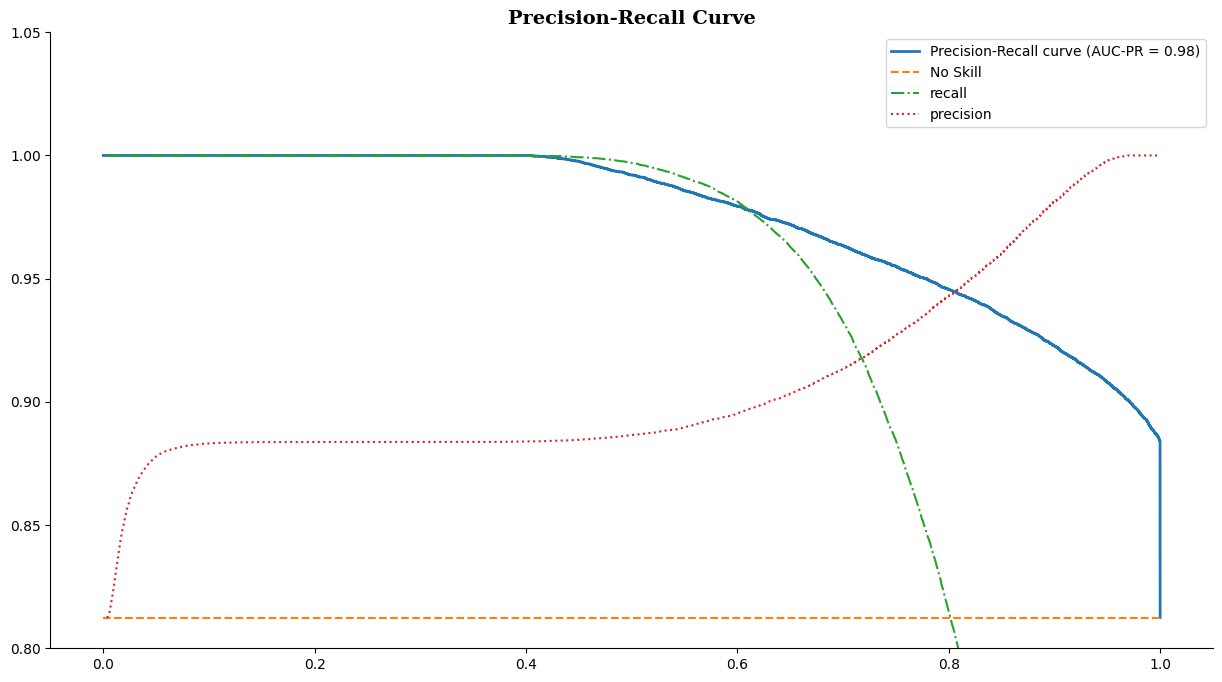

In [159]:
precision, recall, thresholds = precision_recall_curve(y_test, y_reg_pred_proba[:,1])

average_precision = average_precision_score(y_test, y_reg_pred_proba[:,1])

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(15,8))
plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve (AUC-PR = {average_precision:.2f})')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(thresholds, recall[0:thresholds.shape[0]], label='recall',linestyle='-.')
plt.plot(thresholds, precision[0:thresholds.shape[0]], label='precision',linestyle='dotted')
# plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.05])
plt.title('Precision-Recall Curve',fontsize=14,fontfamily='serif',fontweight='bold')
plt.legend(loc='upper right')
sns.despine()
plt.show()

In [161]:
auc(recall, precision)

0.9750571212298236

## Observation

Model performance is represented by the ROC curve area, which is 72%. This shows that 72% of the time, the model successfully differentiates between classes.


To guarantee accurate forecasts, we should ideally strive for a greater True Positive Rate (TPR) and a lower False Positive Rate (FPR).


The ROC curve shows that False Positives rise in tandem with an increase in True Positives.

This trade-off suggests that there is a higher chance of incorrectly classifying Charged Off customers as Fully Paid, which could result in Non-Performing Assets (NPAs), even while there is a greater chance of finding more Fully Paid customers.

The precision-recall curve's Area Under the Curve (AUC) is 0.975. This high AUC value indicates that the model has great precision-recall qualities and performs exceptionally well in differentiating between positive and negative classes.

Precision-recall curves, which concentrate on precise forecasts of the pertinent class (in this example, Class 1-Fully Paid), are essential, particularly in datasets that are unbalanced.


Recall and precision calculations ignore true negatives, concentrating only on accurately predicting fully paid clients.

A high AUC (97.5%) highlights the model's effectiveness and robustness in class distinction.

The goal of optimal model refining is to increase precision by reducing False Positives, which is essential for enhancing overall performance and reducing risks.


In [162]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

lr_model = lr.fit(X_train, y_train)

print(classification_report(y_test, lr_model.predict(X_test)))

cm_bal = confusion_matrix(y_test, lr_model.predict(X_test))
cm_bal_df = pd.DataFrame(cm_bal, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_bal_df

              precision    recall  f1-score   support

           0       0.47      0.81      0.60     11678
           1       0.95      0.79      0.86     50601

    accuracy                           0.79     62279
   macro avg       0.71      0.80      0.73     62279
weighted avg       0.86      0.79      0.81     62279



,Defaulter,Fully paid
Defaulter,9468,2210
Fully paid,10586,40015


In [163]:
lr_model.intercept_

array([6.35576272])

# Thinking from a bank's perspective, which metric should our primary focus be on..

a. ROC AUC
b. Precision
c. Recall
d. F1 Score

Reducing risks and increasing profits are crucial from a bank's point of view. Because it includes both True Positive Rate (TPR) and False Positive Rate (FPR), ROC AUC (Receiver Operating Characteristic Area Under Curve) is in fact an important statistic.

# How does the gap in precision and recall affect the bank?

Evaluating false positives and false negatives, which are measured by metrics like recall and precision, is essential to understanding the mistakes made by a model. A low recall presents a serious danger to the bank.

Thus, the bank will be impacted by the discrepancy between recall and precision. The number of inaccurate guesses will rise as the difference grows.

Reduced False Positives are the result of high precision. So, fewer non-performing loan accounts.

There are fewer False Negatives when recall is high. i.e., keeping loyal customers.


# Which were the features that heavily affected the outcome?

In our situation, the most crucial features appear to be Address (Zipcode), Annual Income, and Grade.

# Will the results be affected by geographical location? (Yes/No)

Yes, it is evident that zip_code (Address) is a crucial attribute, meaning that geographic location affects our outcome.



# Recommendations

To properly control the precision-recall trade-off, concentrate on optimizing the F1 score and area under the Precision-Recall Curve. This improves risk management by lowering false positives and guaranteeing the identification of the majority of defaulters.

Hyperparameter adjustment and the use of more sophisticated classifiers, like as Random Forests or XGBoost, can improve model performance and capture complicated correlations in the data.

Stratified k-fold cross-validation was used to guarantee that the minority class was represented in each fold, yielding accurate model performance estimates.

Examine loans with lower grades more closely, and think about raising interest rates to offset the increased risk.

Use focused tactics, such extra verification procedures or higher interest rates, for high-risk zip codes.

To reduce the risk of default, evaluate small business loans with extra collateral requirements and financial health assessments.

LoanTap can improve loan approval procedures, reduce non-performing asset (NPA) risk, and guarantee long-term growth and financial stability by putting these suggestions into practice.

